In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn import svm
from sklearn.decomposition import PCA

#### Task 1: Exploratory Data Analysis (EDA)

In [41]:
df=pd.read_csv('mushroom.csv')
df.head()

Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat      class stalk_height  \
0  sheathing         chocolate  clustered    waste  poisonous    14.276173   
1  sheathing             brown   numerous    waste     edible     3.952715   
2  sheathing            purple   abundant    waste  poisonous     9.054265   
3   cobwebby             green  clustered  grasses  poisonous     5.226499   
4       none            yellow  clustered    urban  poisonous    14.037532   

  cap_diameter  
0     5.054983  
1    19.068319  
2     7.205884  
3    20.932692  
4    12.545245  

[5 rows x 26 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [5]:
df.describe()

Unnamed: 0  stalk_height  cap_diameter
count  2000.000000   2000.000000   2000.000000
mean    624.974000      8.449118     12.314345
std     375.091938      3.697217      7.048845
min       0.000000      2.000000      1.000000
25%     290.000000      5.291009      5.723521
50%     607.000000      8.318596     12.124902
75%     957.250000     11.781272     18.698605
max    1279.000000     15.095066     25.000054

In [10]:
df.shape

(2000, 26)

In [7]:
df.duplicated().any()

True

In [11]:
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

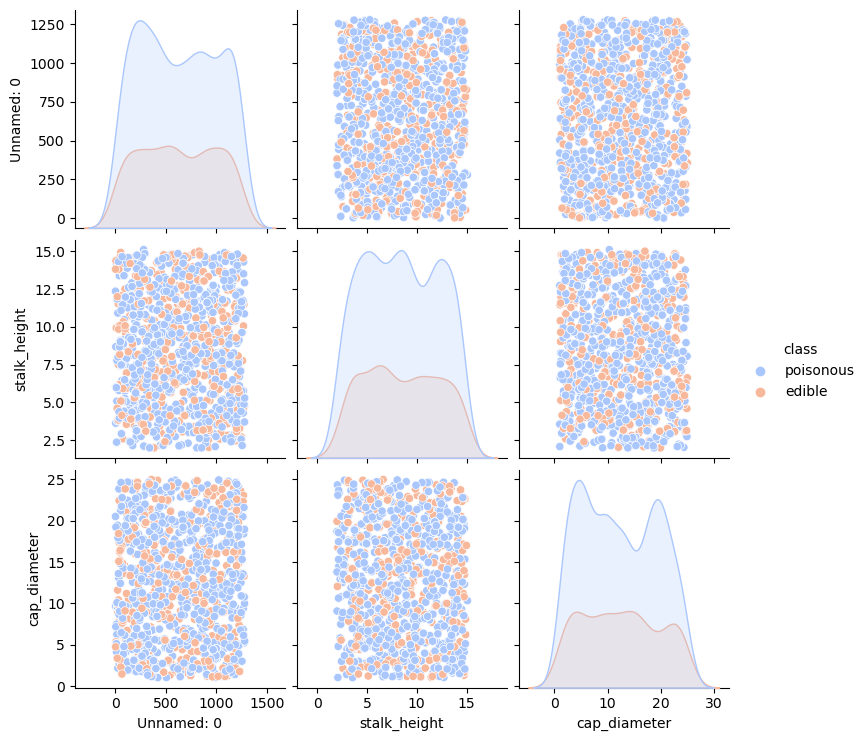

In [12]:
sns.pairplot(df,hue='class',palette='coolwarm')
plt.show()

#### Task 2: Data Preprocessing

In [36]:
num_col=[i for i in df if df[i].dtype!='object']
num_col

['stalk_height', 'cap_diameter']

In [14]:
cat_col=[i for i in df if df[i].dtype=='object']
print(cat_col)

['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat', 'class']


In [18]:
encoders={col:LabelEncoder().fit(df[col]) for col in cat_col}
df2=df[cat_col].apply(lambda col:encoders[col.name].transform(col))
df2.head()

cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
0          4            2          7        0     1                1   
1          4            0          6        0     1                3   
2          3            1          5        1     4                1   
3          0            2          4        1     3                3   
4          3            3          8        1     5                2   

   gill_spacing  gill_size  gill_color  stalk_shape  ...  \
0             2          0           7            1  ...   
1             1          1           3            0  ...   
2             1          0           8            1  ...   
3             0          0           6            0  ...   
4             1          1           6            0  ...   

   stalk_color_above_ring  stalk_color_below_ring  veil_type  veil_color  \
0                       3                       8          0           0   
1                       2                       0          1           0   
2                       8                       3          1           3   
3                       8                       5          0           3   
4                       3                       7          1           2   

   ring_number  ring_type  spore_print_color  population  habitat  class  
0            2          6                  3           1        5      1  
1            2          6                  1           2        5      0  
2            2          6                  6           0        5      1  
3            2          0                  4           1        0      1  
4            0          4                  8           1        4      1  

[5 rows x 23 columns]

In [45]:
label_encoder={}
for column in df.select_dtypes(include=['object']).columns:
    label_encoder[column]=LabelEncoder()
    df[column]=label_encoder[column].fit_transform(df[column])
df

Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
0           1167          4            2          7        0     1   
1           1037          4            0          6        0     1   
2            309          3            1          5        1     4   
3            282          0            2          4        1     3   
4            820          3            3          8        1     5   
...          ...        ...          ...        ...      ...   ...   
1995         863          4            2          0        1     4   
1996        1160          4            2          5        1     5   
1997         265          2            1          3        1     3   
1998         411          0            3          7        0     7   
1999        1073          2            2          8        1     7   

      gill_attachment  gill_spacing  gill_size  gill_color  ...  veil_type  \
0                   1             2          0           7  ...          0   
1                   3             1          1           3  ...          1   
2                   1             1          0           8  ...          1   
3                   3             0          0           6  ...          0   
4                   2             1          1           6  ...          1   
...               ...           ...        ...         ...  ...        ...   
1995                0             1          1           3  ...          0   
1996                0             2          1           9  ...          0   
1997                3             0          1           7  ...          0   
1998                2             0          1           6  ...          1   
1999                1             0          1           8  ...          0   

      veil_color  ring_number  ring_type  spore_print_color  population  \
0              0            2          6                  3           1   
1              0            2          6                  1           2   
2              3            2          6                  6           0   
3              3            2          0                  4           1   
4              2            0          4                  8           1   
...          ...          ...        ...                ...         ...   
1995           1            1          2                  6           0   
1996           2            1          7                  8           2   
1997           0            2          1                  8           0   
1998           3            1          0                  1           5   
1999           2            2          3                  7           2   

      habitat  class  stalk_height  cap_diameter  
0           5      1     14.276173      5.054983  
1           5      0      3.952715     19.068319  
2           5      1      9.054265      7.205884  
3           0      1      5.226499     20.932692  
4           4      1     14.037532     12.545245  
...       ...    ...           ...           ...  
1995        1      1      5.877891     17.464145  
1996        5      1      6.500840     13.501957  
1997        6      1     13.558064     11.270020  
1998        6      1     11.092703      8.423199  
1999        4      1     13.066414     21.056642  

[2000 rows x 26 columns]

In [49]:
corr_matrix=df.corr()
corr_matrix

Unnamed: 0  cap_shape  cap_surface  cap_color  \
Unnamed: 0                  1.000000   0.076872    -0.018136   0.024111   
cap_shape                   0.076872   1.000000    -0.003244   0.009615   
cap_surface                -0.018136  -0.003244     1.000000   0.003153   
cap_color                   0.024111   0.009615     0.003153   1.000000   
bruises                    -0.046627  -0.001190    -0.021352   0.016445   
odor                       -0.012730  -0.030119    -0.021926  -0.065410   
gill_attachment            -0.005051   0.015477    -0.010513   0.023835   
gill_spacing                0.048191  -0.048783     0.068918  -0.015628   
gill_size                  -0.022992   0.040497    -0.038490   0.009888   
gill_color                  0.038452   0.032123     0.045561  -0.005898   
stalk_shape                -0.022255   0.011573    -0.024032  -0.020397   
stalk_root                  0.013280   0.057405    -0.008284  -0.004423   
stalk_surface_above_ring   -0.061770  -0.030537     0.016799  -0.019983   
stalk_surface_below_ring   -0.097594  -0.000870    -0.000493   0.000528   
stalk_color_above_ring     -0.019583  -0.021350    -0.048534   0.038920   
stalk_color_below_ring      0.014746   0.027522    -0.011742   0.036951   
veil_type                   0.019658  -0.039029    -0.068705  -0.020039   
veil_color                 -0.048383  -0.017399     0.040341  -0.036166   
ring_number                -0.067070   0.036999     0.005855   0.055593   
ring_type                   0.022166   0.010172     0.017616   0.021509   
spore_print_color          -0.003308   0.024596    -0.042134   0.082155   
population                  0.018726   0.003602    -0.003963  -0.027551   
habitat                     0.051532   0.028388    -0.038661  -0.025568   
class                       0.005902   0.001140    -0.046409  -0.078029   
stalk_height               -0.001508   0.024540     0.043482   0.044086   
cap_diameter                0.051881   0.037743     0.016606  -0.000489   

                           bruises      odor  gill_attachment  gill_spacing  \
Unnamed: 0               -0.046627 -0.012730        -0.005051      0.048191   
cap_shape                -0.001190 -0.030119         0.015477     -0.048783   
cap_surface              -0.021352 -0.021926        -0.010513      0.068918   
cap_color                 0.016445 -0.065410         0.023835     -0.015628   
bruises                   1.000000  0.026274         0.009402     -0.004458   
odor                      0.026274  1.000000        -0.055214     -0.002847   
gill_attachment           0.009402 -0.055214         1.000000     -0.063604   
gill_spacing             -0.004458 -0.002847        -0.063604      1.000000   
gill_size                 0.041851 -0.027313         0.009386     -0.022650   
gill_color               -0.035135 -0.051793         0.035279     -0.010729   
stalk_shape               0.007928  0.009072        -0.018698      0.051041   
stalk_root               -0.014604 -0.005430        -0.013484      0.000668   
stalk_surface_above_ring -0.043735  0.063281        -0.021187     -0.031336   
stalk_surface_below_ring -0.013857  0.005568        -0.009479     -0.043794   
stalk_color_above_ring    0.009374 -0.006393         0.011811     -0.045491   
stalk_color_below_ring   -0.077316 -0.007103         0.007839      0.003012   
veil_type                 0.016775  0.028177        -0.042727     -0.016567   
veil_color               -0.053680  0.015397        -0.023648      0.004960   
ring_number              -0.022588 -0.068819         0.080437      0.024984   
ring_type                -0.028750  0.033956        -0.006025      0.001516   
spore_print_color        -0.026481 -0.057705         0.039356      0.016376   
population                0.012976 -0.011753        -0.002649     -0.004920   
habitat                   0.013392 -0.051237         0.005944      0.004055   
class                    -0.015498  0.039536        -0.028194      0.046505   
stalk_height             

#### Task 3: Data Visualization

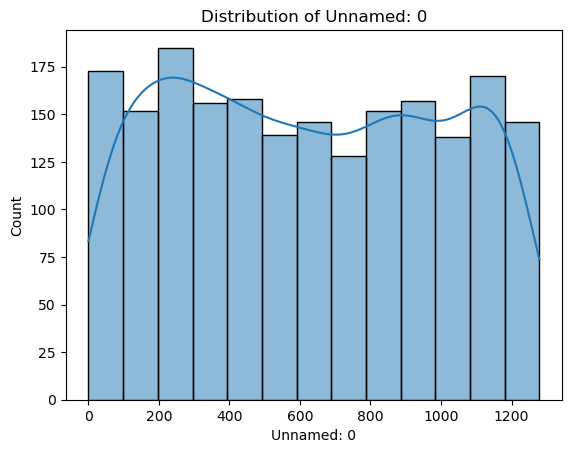

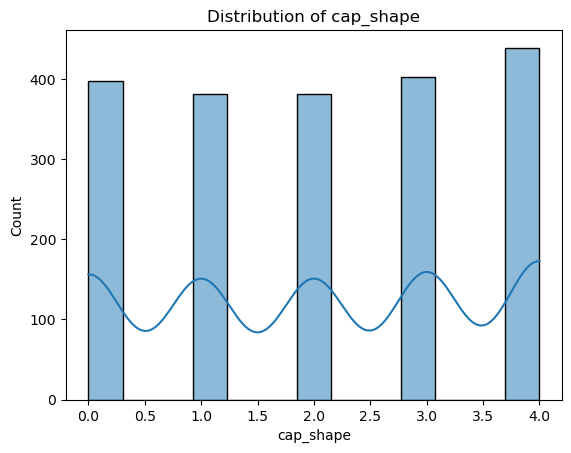

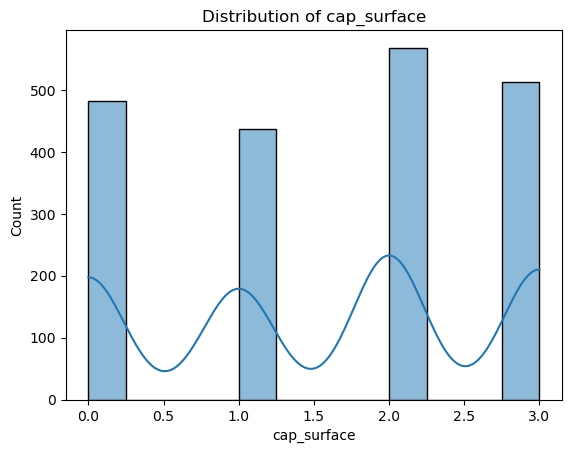

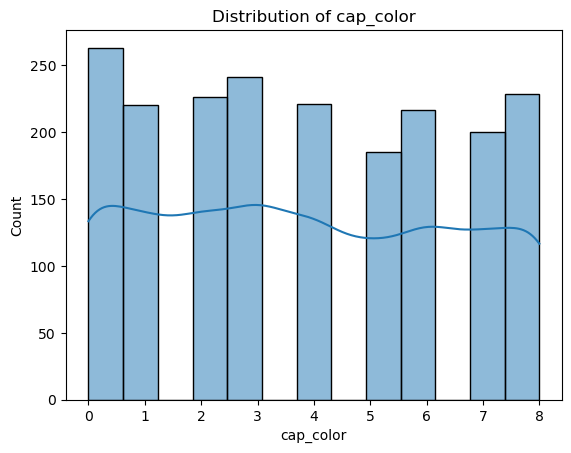

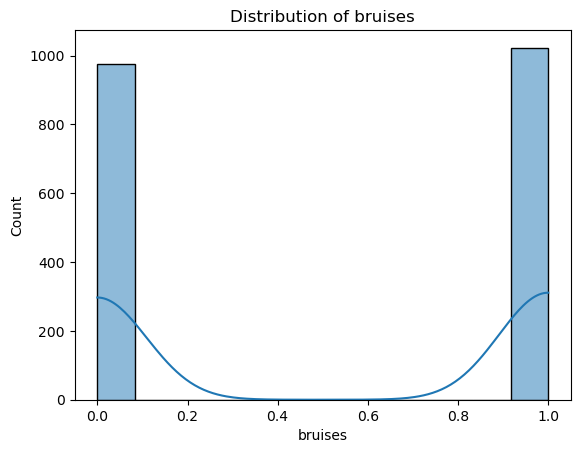

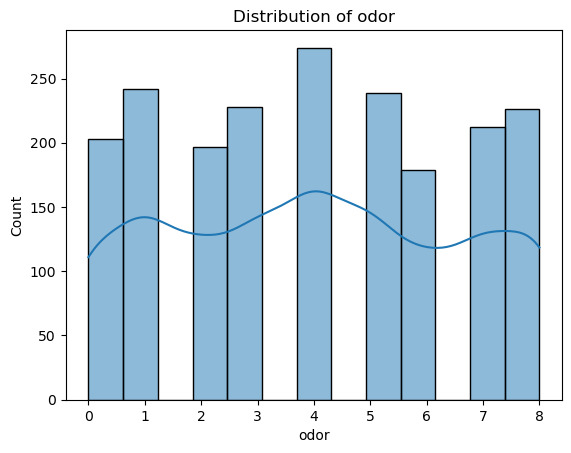

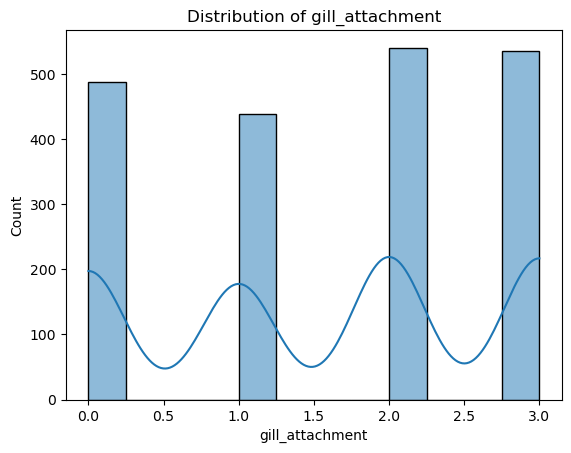

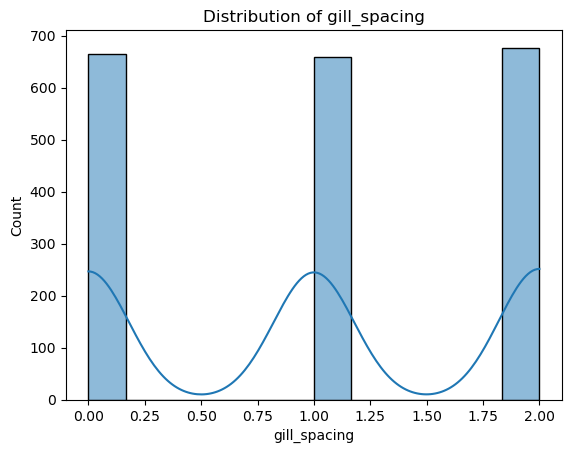

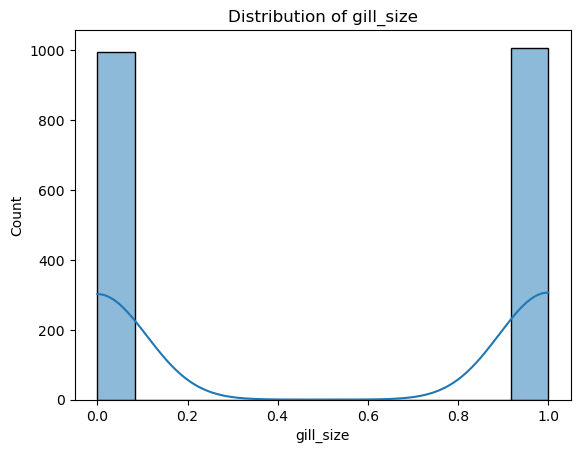

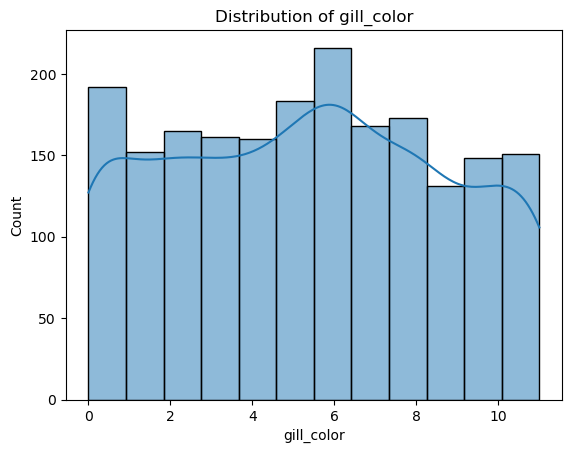

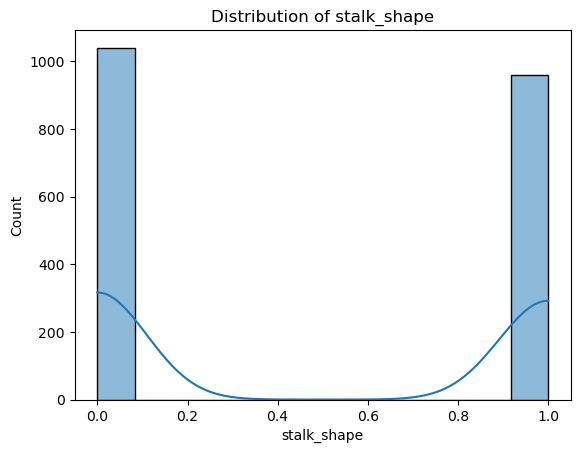

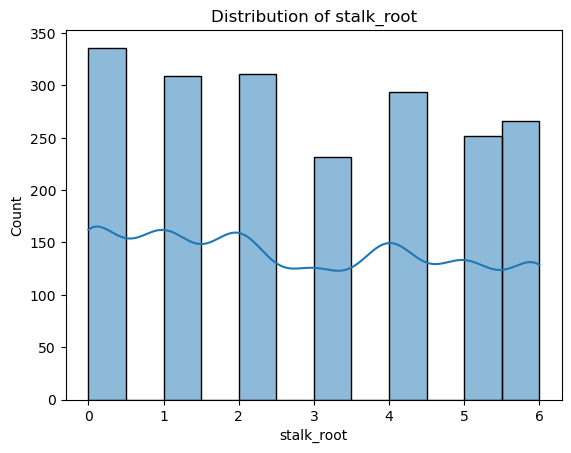

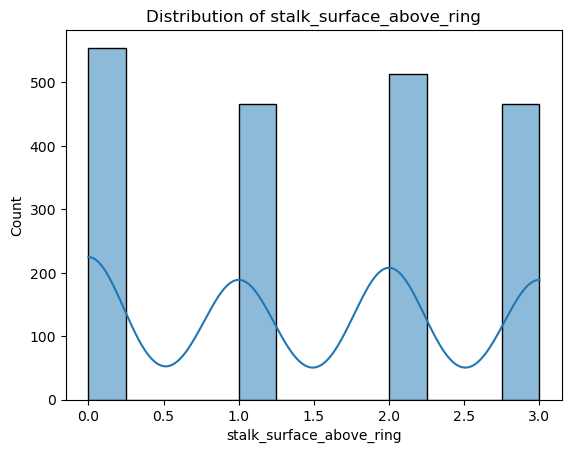

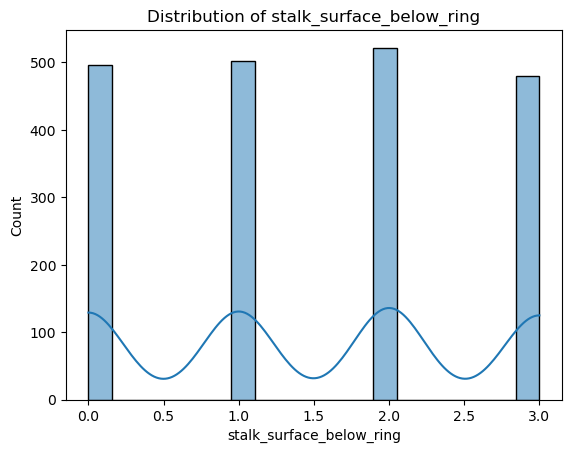

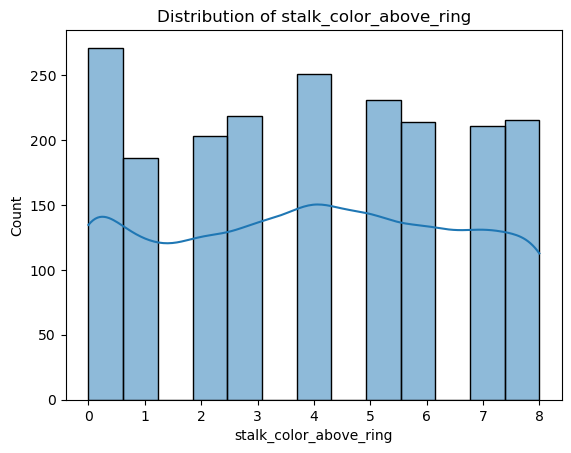

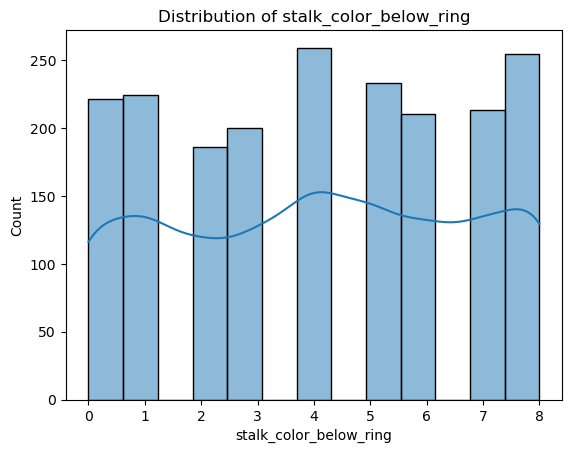

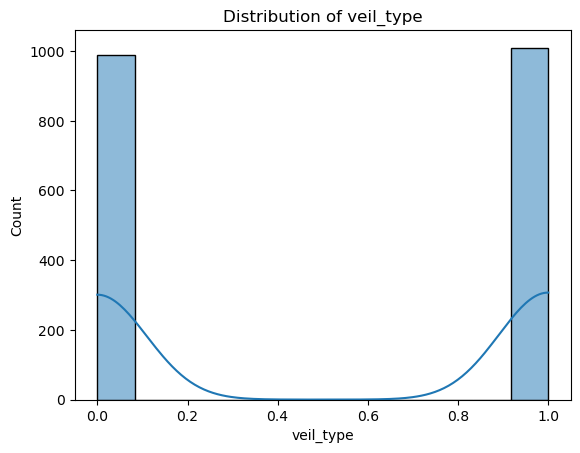

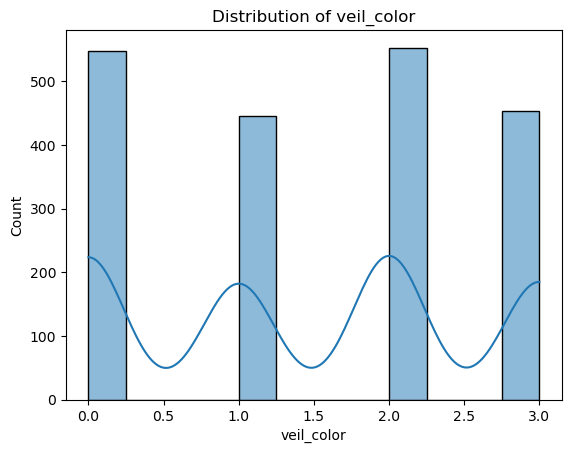

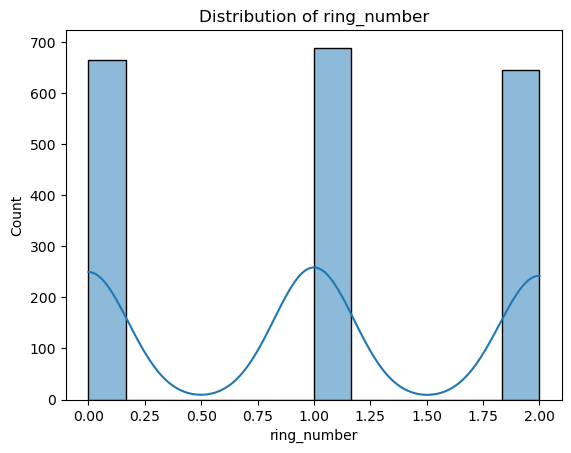

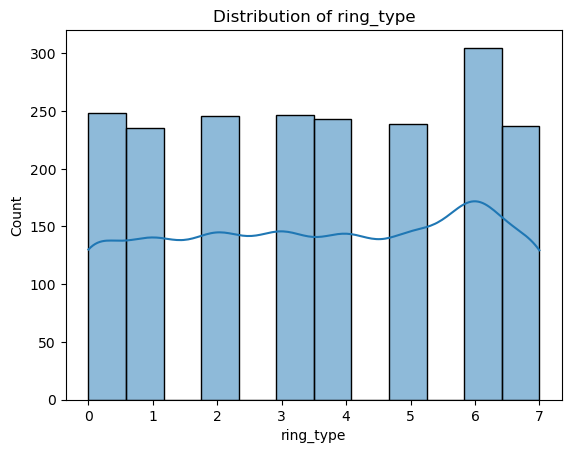

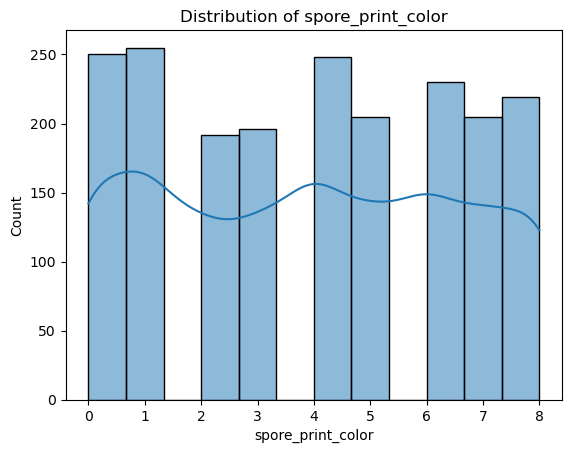

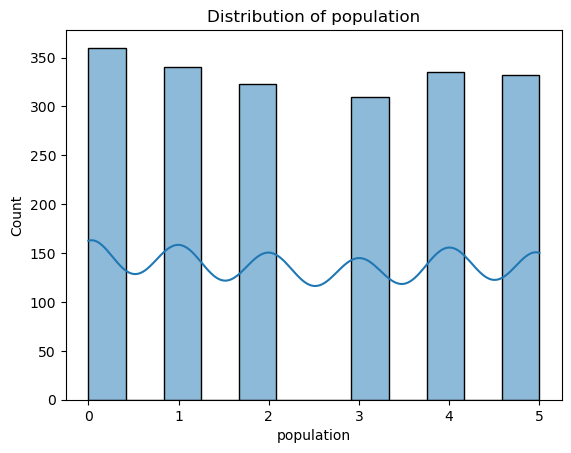

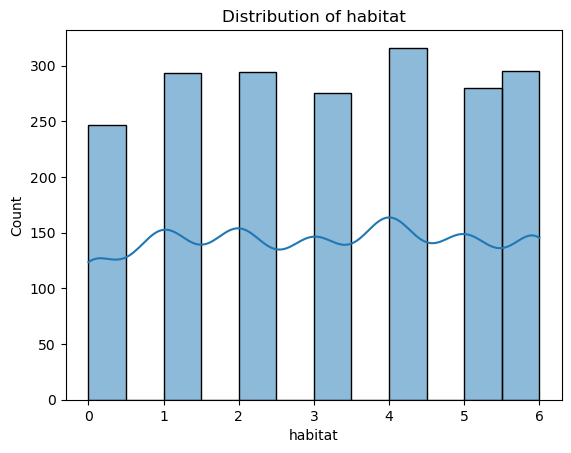

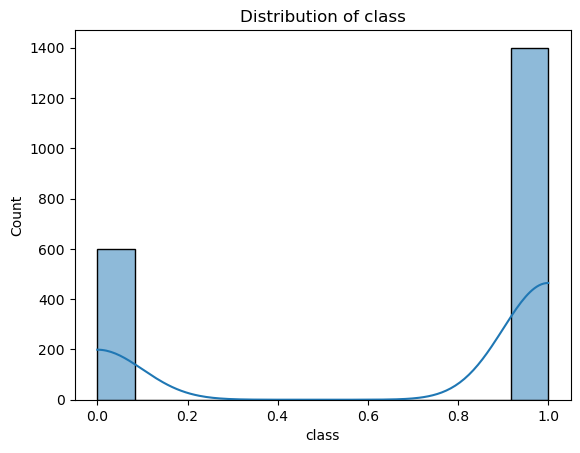

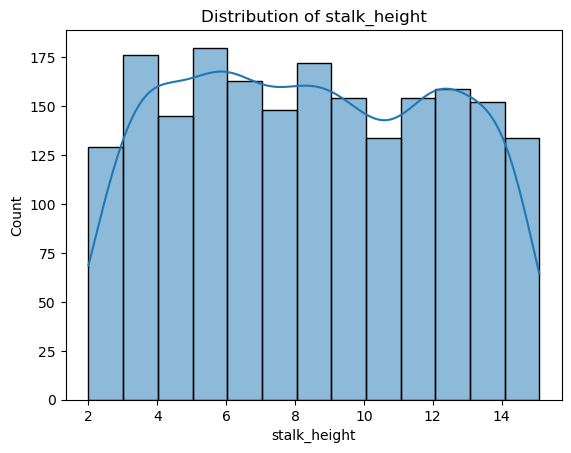

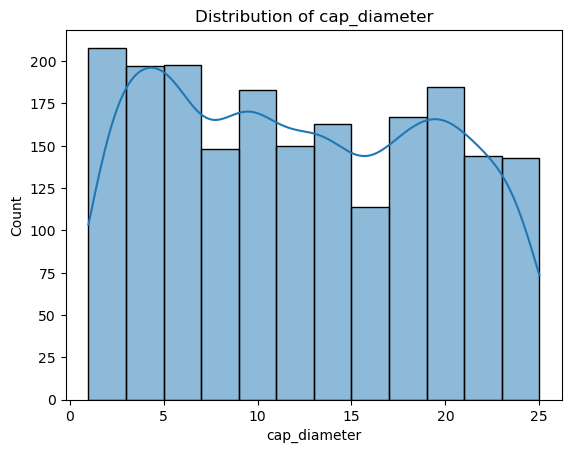

In [47]:
for column in df.columns:
    if df[column].dtype=='object':
        sns.countplot(data=df,x=column)
        plt.title(f'Distribution of {column}')
        plt.xticks(rotation=90)
        plt.show()
    else:
        sns.histplot(df[column],kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()


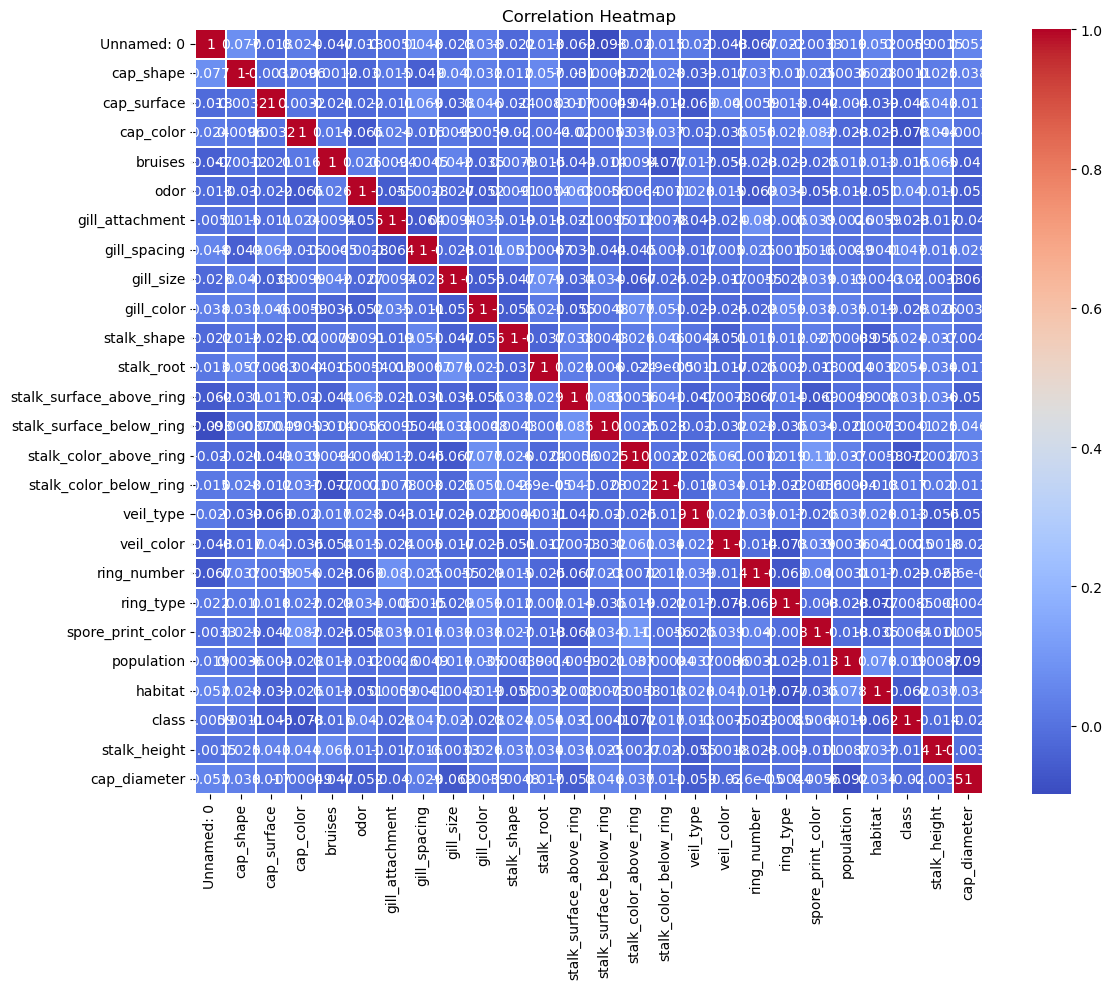

In [53]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',linewidths=0.2)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

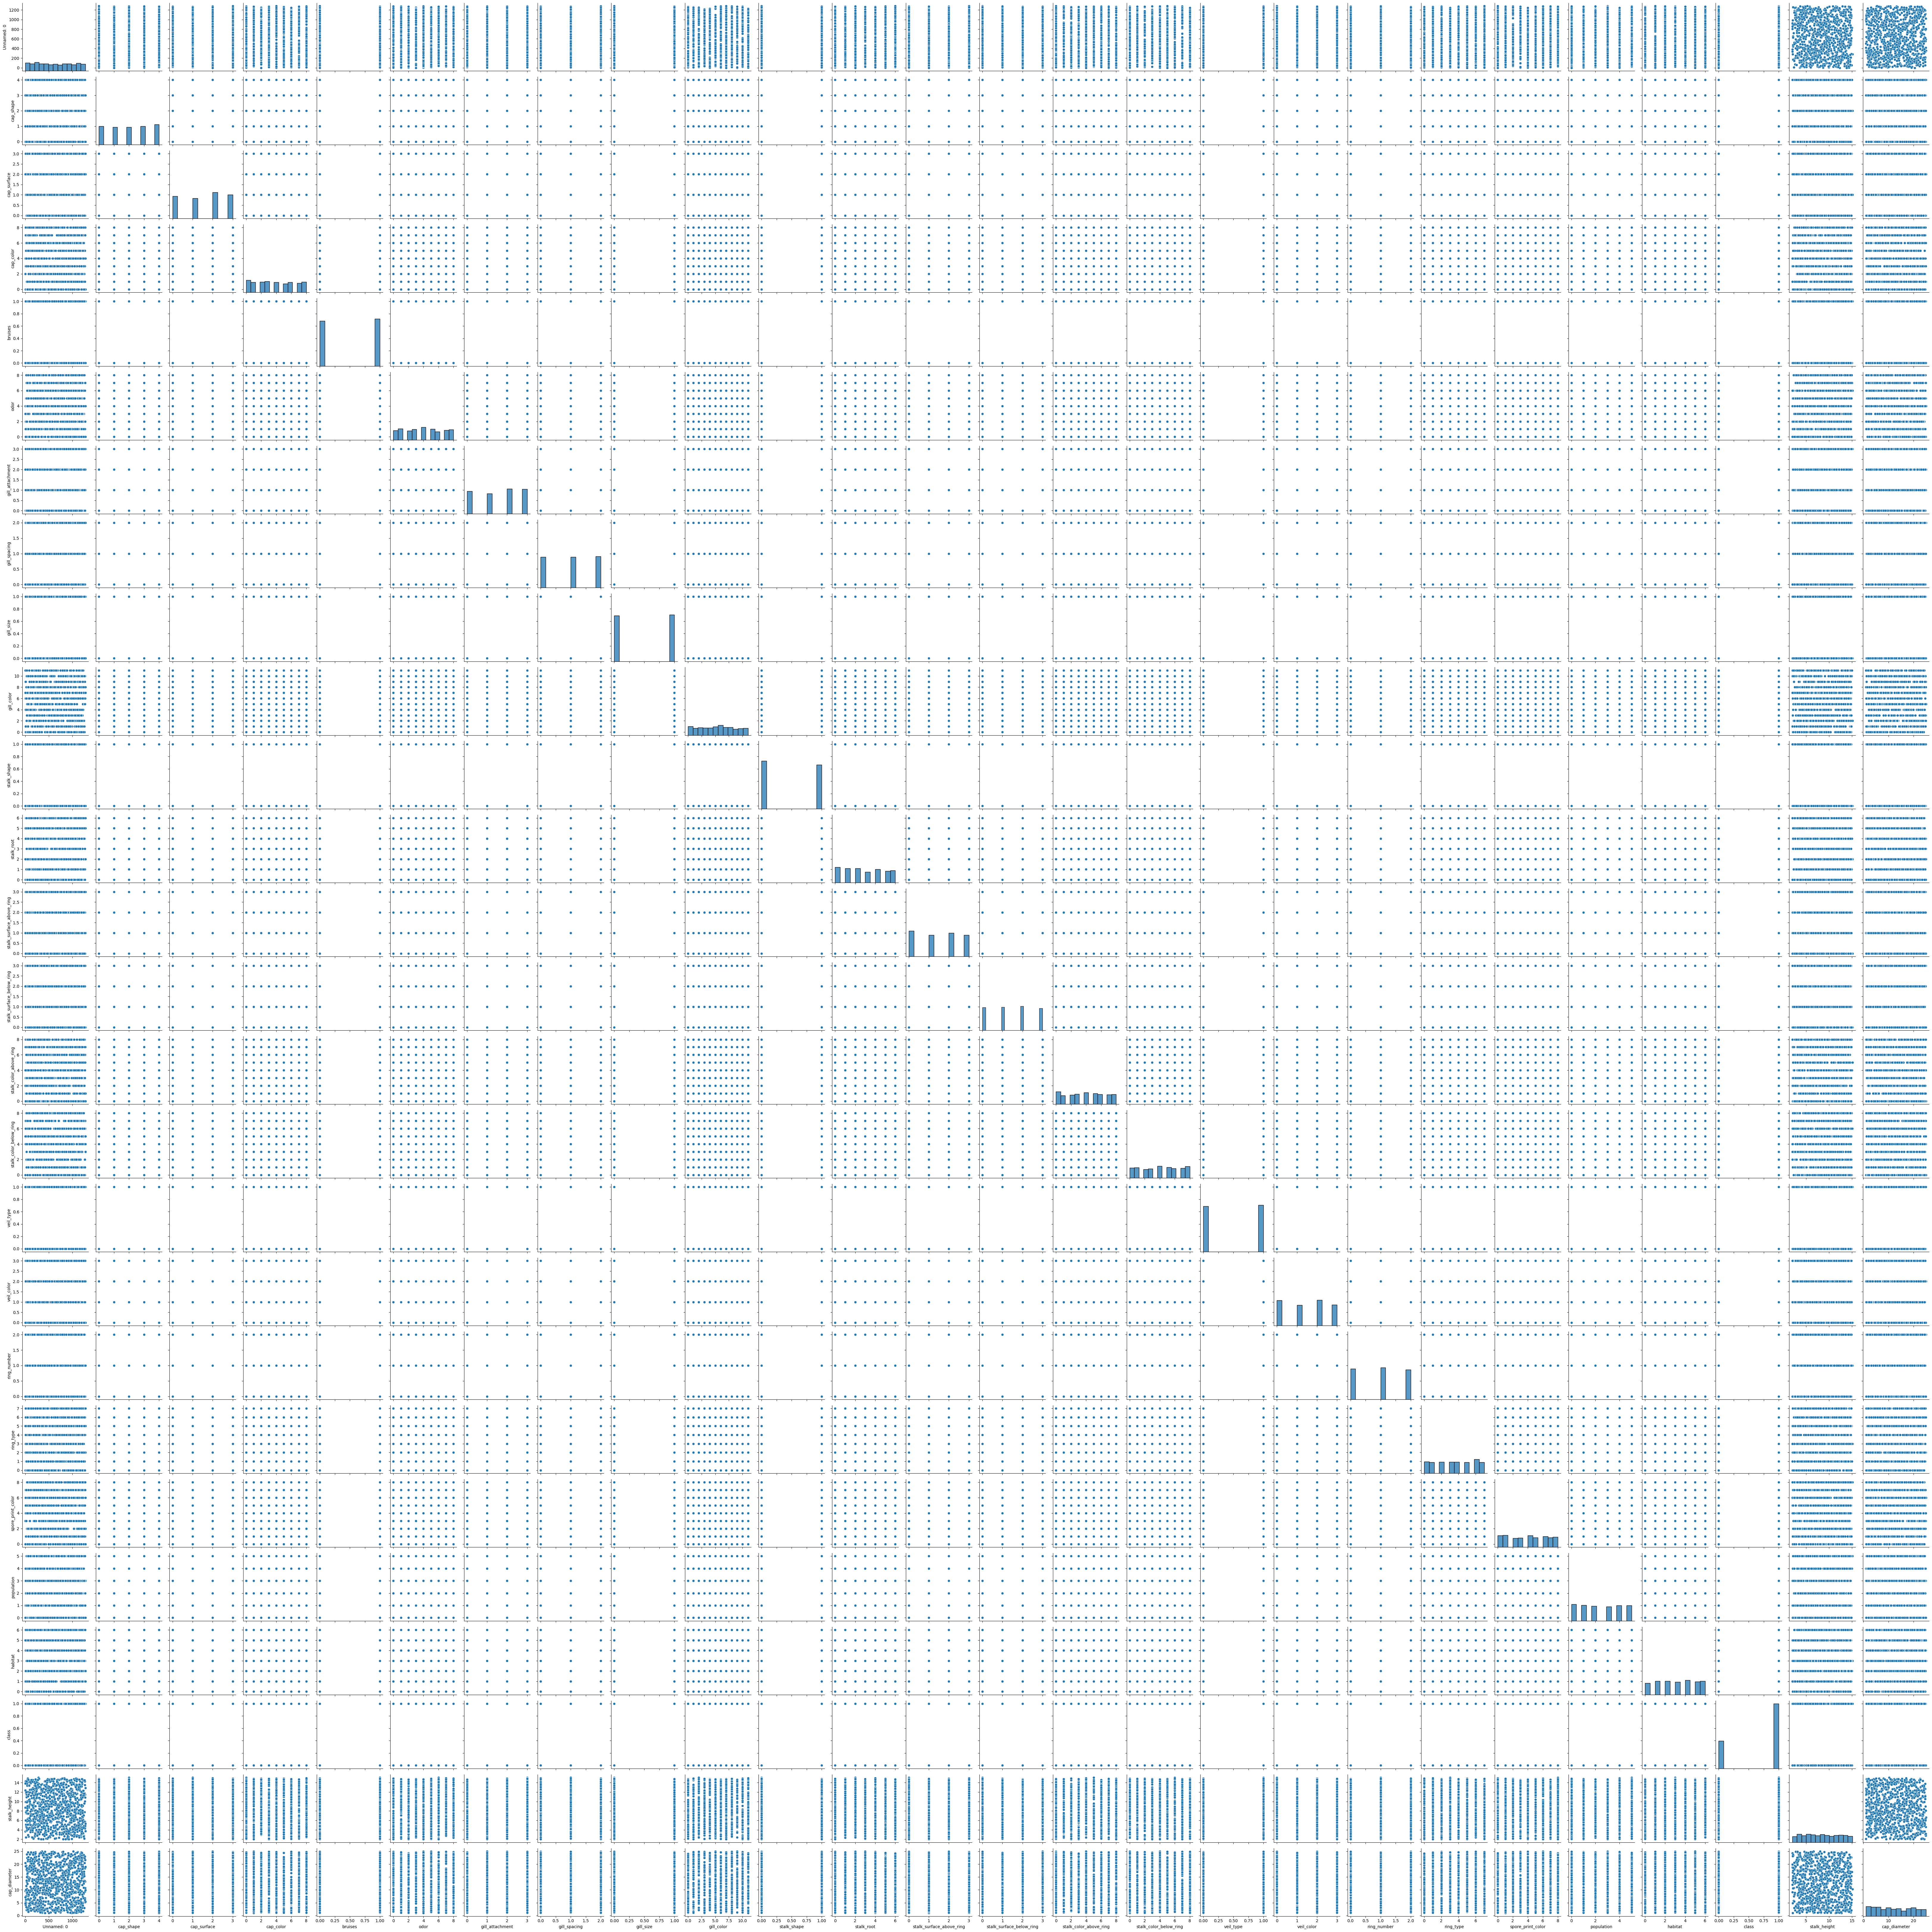

In [69]:
sns.pairplot(df)
plt.tight_layout()
plt.show()

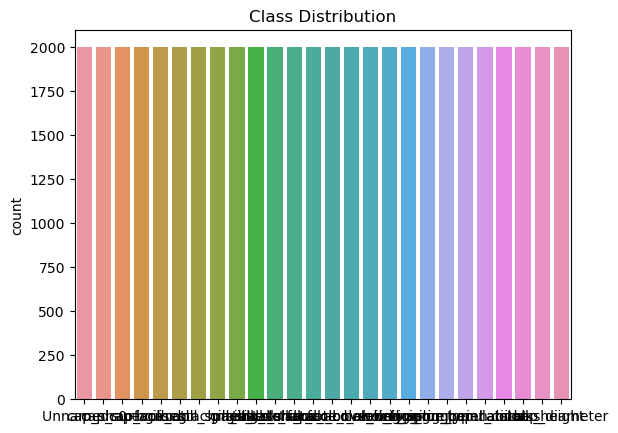

In [58]:
sns.countplot(df)
plt.title("Class Distribution")
plt.show()

In [56]:
features=df.drop(columns='Unnamed: 0')
target=df[['Unnamed: 0']]
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.7,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape) 
print(y_test.shape)

(1400, 25)
(600, 25)
(1400, 1)
(600, 1)


In [60]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print(pd.DataFrame(x_train))
print(pd.DataFrame(x_test))

            0         1         2         3         4         5         6   \
0    -0.031672  0.403397 -1.479020 -1.026054  0.377645 -1.388594 -1.225023   
1    -1.439324  1.295585  0.812343 -1.026054 -1.586333 -0.498470  1.209374   
2    -1.439324 -0.488792  0.048555  0.974608 -0.407946  0.391655 -0.007825   
3    -1.439324  0.403397  0.048555  0.974608  1.163236 -1.388594 -0.007825   
4     1.375980 -0.488792  0.430449 -1.026054 -1.586333  0.391655  1.209374   
...        ...       ...       ...       ...       ...       ...       ...   
1395  1.375980  0.403397  1.576131 -1.026054 -1.193537  1.281779 -1.225023   
1396 -0.735498 -0.488792  0.812343  0.974608 -0.015151  1.281779  1.209374   
1397  0.672154  1.295585 -1.479020 -1.026054 -0.015151 -1.388594  1.209374   
1398  1.375980 -0.488792  1.576131 -1.026054 -1.193537 -0.498470 -0.007825   
1399  0.672154  1.295585  0.812343  0.974608 -1.586333  1.281779 -0.007825   

            7         8         9   ...        15        16    

#### Task 4: SVM Implementation

In [63]:
svm_model=svm.SVC(kernel='linear')

In [92]:
svm_model.fit(x_train,y_train)

SVC()

In [65]:
y_pred_test=svm_model.predict(x_test)
print(y_pred_test)

[  70 1051 1027  194   77  880  187  929  177  979  377  280  576  282
  893  106  898 1105  433  982  199  293 1277 1068  262  986  180  850
 1043 1198 1265  327  486  664  456  557   94  456  330  704   69  731
    8 1039  405  823  576  255 1275 1005 1124  795  180  404 1272  319
  988  909  168  470   45  903  751 1106  855 1069  250  959  224 1147
 1203  965  227 1204 1198 1192  958  668  371  458  532  767 1182 1222
  696  815  518 1193 1156 1020  146  245  302 1156   66  904  290  128
  337  225 1101  115    9  669  770  916  433  706  447  102  373 1131
  115 1071  961   74  125  433  564 1154 1144  979  972 1046  171  339
  399 1182  226  512  302 1082 1093    0  490 1039 1142  445  327 1199
  545  887  171 1184 1154  607 1167  731   28  801  766  588 1134  767
  731  879  521  298 1223  948  177  377 1198 1060   48  702  942  979
 1069  495  109 1125  505  354  686 1036  470  883 1224  425  420 1192
  976 1097  646  704  788  102  694 1047    1  779   50  655  965 1204
  978 

In [66]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
cf=classification_report(y_pred_test,y_test)
print('classification_report',cf)

classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.50      0.67         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         0
           8       1.00      0.33      0.50         3
           9       1.00      1.00      1.00         2
          10       0.00      0.00      0.00         0
          14       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          23       0.00      0.00      0.00         1
          24       1.00      1.00      1.00         1
          27       0.00      0.00      0.00         1
          28       1.00      0.33      0.50         3
          30       0.00      0.00      0.00         1
          34       1.00      1.00      1.00         1
          35       1.00      1.00      1.00         1
          36       0.00      0.00      0.00         0
     

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\s

In [67]:
accuracy=accuracy_score(y_test,y_pred_test)
print("Accuracy:",accuracy)

Accuracy: 0.6966666666666667


In [70]:
cm=confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:",cm)

Confusion Matrix: [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


#### Task 5: Visualization of SVM Results

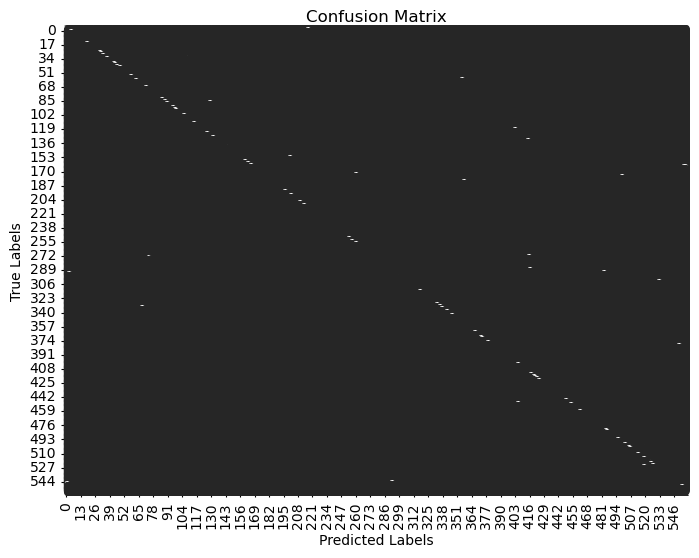

In [71]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

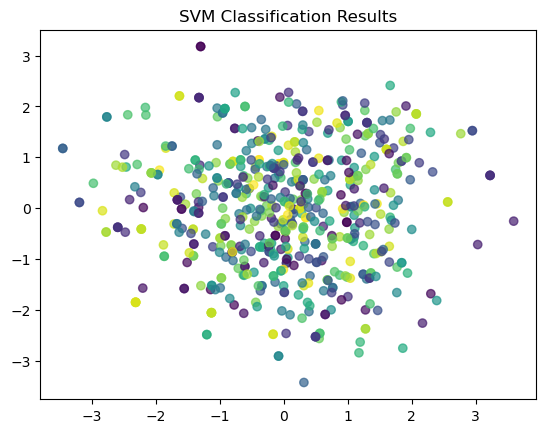

In [77]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_test)
plt.scatter(x_pca[:,0],x_pca[:, 1],c=y_pred_test,cmap='viridis',alpha=0.7)
plt.title("SVM Classification Results")
plt.show()

#### Task 6: Comparison and Analysis

In [87]:
import warnings
warnings.filterwarnings('ignore')

In [88]:
kernels=['linear','poly','rbf']
for kernel in kernels:
    svm_model=SVC(kernel=kernel)
    svm_model.fit(x_train,y_train)
    y_pred=svm_model.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print("Kernel:",kernel)
    print("Accuracy:",accuracy)
    print(classification_report(y_test,y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test,y_pred))

Kernel: linear
Accuracy: 0.6966666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.50      1.00      0.67         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         2
           8       0.33      1.00      0.50         1
           9       1.00      1.00      1.00         2
          10       0.00      0.00      0.00         1
          14       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          23       0.00      0.00      0.00         0
          24       1.00      1.00      1.00         1
          27       0.00      0.00      0.00         0
          28       0.33      1.00      0.50         1
          30       0.00      0.00      0.00         0
          34       1.00      1.00      1.00         1
          35       1.00      1.00      1.00         1
          36       0.00      0.00    

In [89]:
results=[]
for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(x_train,y_train)
    y_pred=svm.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    results.append((kernel,acc))

In [90]:
results_df=pd.DataFrame(results,columns=["Kernel","Accuracy"])
results_df

Kernel  Accuracy
0  linear  0.696667
1    poly  0.571667
2     rbf  0.658333

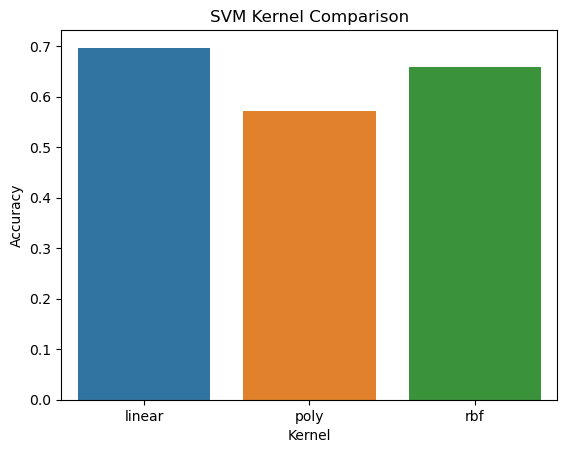

In [91]:
sns.barplot(data=results_df,x="Kernel",y="Accuracy")
plt.title("SVM Kernel Comparison")
plt.show()